## t-test 연습

데이터 셋: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

위 데이터 셋은 넷플릭스 오리지널 시리즈의 메타 데이터와 평점을 담은 데이터 셋입니다. 지금까지 배운 시각화와 통계 기법들을 활용하여 넷플릭스의 데이터 분석가가 되었다고 생각하고 데이터를 통해서 인사이트를 전달해보세요.

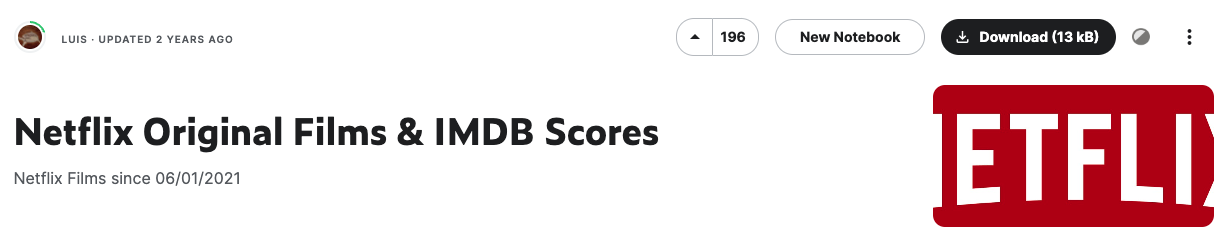

## 요구 사항
- 기본적인 EDA와 시각화를 해주세요. 
- t-test 기법을 다양하게 사용해보세요.
- 통계적 근거를 활용하여 오리지널 시리즈 제작 방향에 대한 제언을 해보세요. 
- 결과물을 velog에 기록해주세요. (선택)

In [215]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [216]:
df = pd.read_csv("./data/NetflixOriginals.csv", encoding='latin1')

In [217]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [219]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [220]:
df['Genres'] = df['Genre'].str.split('/').apply(lambda genres: [genre.strip().lower() for genre in genres])

df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('science fiction', 'sci_fi') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('musicial', 'musical') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('making-of', 'making_of') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('romantic', 'romance') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('biopic', 'biographical') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('black comedy', 'dark_comedy') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('dark comedy', 'dark_comedy') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('mentalism special', 'supernatural') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('one-man show', 'one_man_show') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('stop motion', 'stop_motion') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('teen ', 'teenage ') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('hidden-camera prank ', '') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('coming-of-age', 'coming_of_age') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('variety show', 'variety_show') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('animated', 'animation') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('anime', 'animation') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace(' film', '') for genre in genres])

df['Genres'] = df['Genres'].apply(lambda genres: [word for genre in genres for word in genre.split('-')])
df['Genres'] = df['Genres'].apply(lambda genres: [word for genre in genres for word in genre.split(' ')])

unique_genres = sorted(df['Genres'].explode().unique())
num_unique_genres = len(unique_genres)

print(num_unique_genres)
print(unique_genres)

47
['action', 'adventure', 'aftershow', 'animation', 'anthology', 'biographical', 'christian', 'christmas', 'comedy', 'coming_of_age', 'concert', 'crime', 'dance', 'dark_comedy', 'documentary', 'drama', 'epic', 'family', 'fantasy', 'heist', 'historical', 'holiday', 'horror', 'interview', 'making_of', 'mockumentary', 'musical', 'mystery', 'one_man_show', 'political', 'psychological', 'romance', 'satire', 'sci_fi', 'short', 'sports', 'spy', 'stop_motion', 'superhero', 'supernatural', 'teenage', 'thriller', 'urban', 'variety_show', 'war', 'western', 'zombie']


In [221]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary]
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"[horror, thriller]"
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[mystery]
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[concert]
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,[documentary]
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[one_man_show]
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[documentary]


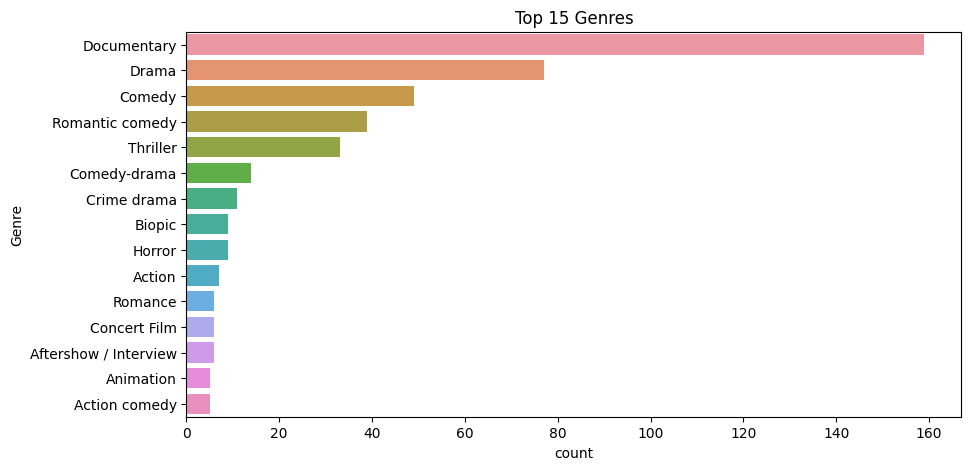

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# 장르 별로 카운트
genre_counts = df['Genre'].value_counts()

# 상위 15개 장르 선택
top15_genres = genre_counts[:15].index

# 상위 15개 장르에 해당하는 데이터만 선택
top15_data = df[df['Genre'].isin(top15_genres)]

# 바 그래프
plt.figure(figsize=(10, 5))
sns.countplot(y='Genre', data=top15_data, order=top15_genres)
plt.title('Top 15 Genres')
plt.show()



In [223]:
df['Language'].unique()


array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [224]:
print(language_counter.most_common())

[('English', 422), ('Spanish', 39), ('Hindi', 35), ('French', 21), ('Italian', 14), ('Portuguese', 12), ('Indonesian', 9), ('Japanese', 8), ('Korean', 7), ('Turkish', 5), ('German', 5), ('Dutch', 3), ('Polish', 3), ('Marathi', 3), ('Mandarin', 3), ('Filipino', 2), ('Thai', 2), ('Swedish', 2), ('Russian', 2), ('Malay', 1), ('Norwegian', 1), ('Basque', 1), ('Catalan', 1), ('Taiwanese', 1), ('Thia', 1), ('Georgian', 1), ('Bengali', 1), ('Khmer', 1), ('Tamil', 1), ('Arabic', 1), ('Akan', 1), ('Ukranian', 1)]


In [204]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary]
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"[horror, thriller]"
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[mystery]
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[concert]
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,[documentary]
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[one_man_show]
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[documentary]


In [205]:
df['Languages'] = df['Language'].str.split('/').apply(lambda languages: [language.strip().lower() for language in languages])

In [206]:
df['Languages']

0               [english, japanese]
1                         [spanish]
2                         [italian]
3                         [english]
4                           [hindi]
                   ...             
579                       [english]
580    [english, ukranian, russian]
581                       [english]
582                    [portuguese]
583                       [english]
Name: Languages, Length: 584, dtype: object

In [207]:
# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 평균 평점 계산
genre_avg_scores = expanded_df.groupby('Genres')['IMDB Score'].mean()

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_avg_scores = genre_avg_scores.sort_values(ascending=False)

# 정렬된 결과 출력
print(sorted_genre_avg_scores)

Genres
concert          7.633333
making_of        7.450000
coming_of_age    7.200000
one_man_show     7.133333
historical       7.050000
documentary      6.936478
epic             6.900000
short            6.771429
interview        6.750000
aftershow        6.750000
war              6.740000
crime            6.676923
animation        6.638095
spy              6.600000
christmas        6.580000
adventure        6.470000
biographical     6.440000
urban            6.300000
drama            6.278295
supernatural     6.250000
psychological    6.233333
stop_motion      6.200000
sports           6.100000
holiday          6.100000
dance            6.100000
variety_show     6.100000
musical          6.085714
dark_comedy      6.040000
anthology        5.950000
romance          5.900000
zombie           5.900000
family           5.885714
fantasy          5.850000
mockumentary     5.850000
comedy           5.822794
satire           5.800000
sci_fi           5.794737
action           5.757143
chris

In [208]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres,Languages
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary],"[english, japanese]"
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller],[spanish]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]",[italian]
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"[horror, thriller]",[english]
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[mystery],[hindi]
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[concert],[english]
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,[documentary],"[english, ukranian, russian]"
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[one_man_show],[english]
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[documentary],[portuguese]


In [209]:
# 'Genres' 열의 값을 문자열로 변환
df['Genres'] = df['Genres'].apply(lambda x: ','.join(x))

# 'Genres' 열에 어떤 값이 포함되어 있는지 출력
print(df['Genres'].unique())


['documentary' 'thriller' 'sci_fi,drama' 'horror,thriller' 'mystery'
 'action' 'comedy' 'heist,thriller' 'musical,western,fantasy' 'drama'
 'romance,comedy' 'action,comedy' 'horror,anthology' 'political,thriller'
 'superhero,comedy' 'horror' 'romance,drama' 'animation,short' 'superhero'
 'heist' 'western' 'animation,superhero' 'family' 'action,thriller'
 'teenage,comedy,drama' 'animation' 'aftershow,interview'
 'christmas,musical' 'sci_fi,adventure' 'sci_fi' 'variety_show'
 'comedy,drama' 'comedy,fantasy,family' 'supernatural,drama'
 'action,sci_fi' 'romance,teenage,drama' 'comedy,musical' 'musical'
 'sci_fi,mystery' 'crime,drama' 'psychological,thriller,drama'
 'adventure,comedy' 'dark_comedy' 'romance' 'horror,comedy'
 'christian,musical' 'comedy,horror' 'psychological,thriller'
 'biographical' 'sci_fi,thriller' 'mockumentary' 'satire' 'one_man_show'
 'romance,comedy,drama' 'fantasy' 'sports,drama' 'zombie,heist'
 'psychological,horror' 'sports' 'comedy,mystery' 'romance,thriller'
 '

In [210]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres,Languages
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,documentary,"[english, japanese]"
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,thriller,[spanish]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"sci_fi,drama",[italian]
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"horror,thriller",[english]
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,mystery,[hindi]
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,concert,[english]
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,documentary,"[english, ukranian, russian]"
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,one_man_show,[english]
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,documentary,[portuguese]


In [211]:
# "Genres" 열에 "concert"을 포함한 항목을 필터링합니다.
concert_df = df[df['Genres'].str.contains('concert', case=False)]

# 결과를 출력합니다.
print(concert_df)


                                           Title         Genre  \
293         Ariana Grande: Excuse Me, I Love You  Concert Film   
525                Shawn Mendes: Live in Concert  Concert Film   
532  Barbra: The Music, The Mem'ries, The Magic!  Concert Film   
557       Justin Timberlake + The Tennessee Kids  Concert Film   
578   Ben Platt: Live from Radio City Music Hall  Concert Film   
579        Taylor Swift: Reputation Stadium Tour  Concert Film   

              Premiere  Runtime  IMDB Score Language   Genres  Languages  
293  December 21, 2020       97         6.4  English  concert  [english]  
525  November 25, 2020       87         7.4  English  concert  [english]  
532  November 22, 2017      108         7.5  English  concert  [english]  
557   October 12, 2016       90         7.7  English  concert  [english]  
578       May 20, 2020       85         8.4  English  concert  [english]  
579  December 31, 2018      125         8.4  English  concert  [english]  


In [212]:
newdf = pd.read_csv("./data/NetflixOriginals.csv", encoding='latin1')

In [213]:
# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = newdf.explode('Genre')

# 장르별로 그룹화하고 평균 평점 계산
genre_avg_scores = expanded_df.groupby('Genre')['IMDB Score'].mean()

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_avg_scores = genre_avg_scores.sort_values(ascending=False)

# 정렬된 결과 출력
print(sorted_genre_avg_scores)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
                                          ...   
Superhero-Comedy                        4.400000
Political thriller                      4.300000
Horror anthology                        4.300000
Musical/Western/Fantasy                 3.900000
Heist film/Thriller                     3.700000
Name: IMDB Score, Length: 115, dtype: float64


In [282]:
# df['Genre_combinations'] = df['Genres'].apply(lambda genres: '/'.join(sorted(genres)))
# genre_avg_scores = df.groupby('Genre_combinations').agg({'IMDB Score': 'mean', 'Title': 'count'})
# genre_avg_scores = genre_avg_scores.rename(columns={'Title': 'Movie Count'})
# genre_avg_scores = genre_avg_scores.sort_values(by='IMDB Score', ascending=False)

# for index, row in genre_avg_scores.iterrows():
#     genre_combination = index
#     avg_score = row['IMDB Score']
#     movie_count = int(row['Movie Count'])
#     movies = df[df['Genre_combinations'] == genre_combination]

#     print(f'장르: {genre_combination}\n평균 평점: {avg_score:.2f} | 편수: {movie_count}')
#     print('-' * 40)
#     for _, movie in movies.iterrows():
#         movie_title = movie['Title']
#         movie_score = movie['IMDB Score']
#         print('-', movie_title, f'({movie_score:.2f})')
#     print('\n')

In [225]:
df['Genre_combinations'] = df['Genres'].apply(lambda genres: '/'.join(sorted(genres, key=str.lower)))

genre_avg_scores = df.groupby('Genre_combinations').agg({'IMDB Score': 'mean', 'Title': 'count'})
genre_avg_scores = genre_avg_scores.rename(columns={'Title': 'Movie Count'})
genre_avg_scores = genre_avg_scores.sort_values(by='IMDB Score', ascending=False)

for index, row in genre_avg_scores.iterrows():
    genre_combination = index
    avg_score = row['IMDB Score']
    movie_count = int(row['Movie Count'])
    movies = df[df['Genre_combinations'] == genre_combination]

    print(f'장르: {genre_combination}\n평균 평점: {avg_score:.2f} | 편수: {movie_count}')
    print('-' * 40)
    for _, movie in movies.iterrows():
        movie_title = movie['Title']
        movie_score = movie['IMDB Score']
        print('-', movie_title, f'({movie_score:.2f})')
    print('\n')


장르: adventure/animation/christmas/comedy
평균 평점: 8.20 | 편수: 1
----------------------------------------
- Klaus (8.20)


장르: musical/short
평균 평점: 7.70 | 편수: 1
----------------------------------------
- Anima (7.70)


장르: concert
평균 평점: 7.63 | 편수: 6
----------------------------------------
- Ariana Grande: Excuse Me, I Love You (6.40)
- Shawn Mendes: Live in Concert (7.40)
- Barbra: The Music, The Mem'ries, The Magic! (7.50)
- Justin Timberlake + The Tennessee Kids (7.70)
- Ben Platt: Live from Radio City Music Hall (8.40)
- Taylor Swift: Reputation Stadium Tour (8.40)


장르: anthology/dark_comedy
평균 평점: 7.60 | 편수: 1
----------------------------------------
- Ludo (7.60)


장르: making_of
평균 평점: 7.45 | 편수: 2
----------------------------------------
- The Road to El Camino: A Breaking Bad Movie (7.20)
- Road to Roma (7.70)


장르: action/adventure
평균 평점: 7.30 | 편수: 1
----------------------------------------
- Okja (7.30)


장르: comedy/coming_of_age/drama
평균 평점: 7.20 | 편수: 1
---------------------

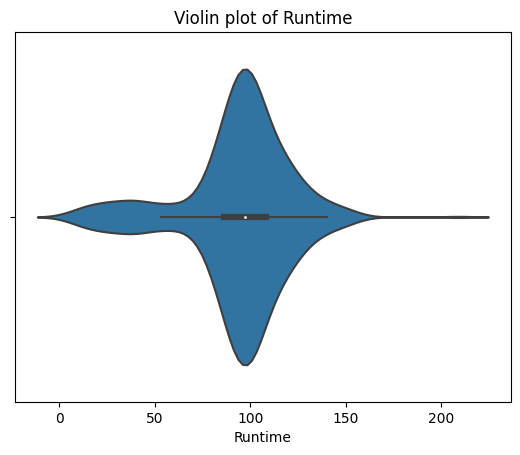

In [226]:
sns.violinplot(x=df['Runtime'])
plt.xlabel('Runtime')
plt.title('Violin plot of Runtime')
plt.show()


귀무가설 : 'Runtime'이 90 이상에서 110인 영화들과 그 외 시간대의 영화들의 'IMDB Score'에는 차이가 없다.

대립가설 : 'Runtime'이 90 이상에서 110인 영화들의 'IMDB Score'가 그 외 시간대의 영화들의 'IMDB Score'보다 높다.

In [229]:
import scipy.stats as stats

# Runtime이 90 이상에서 110인 영화들과 그 외 시간대의 영화들을 나누어 그룹 생성
group_high_runtime = df[(df['Runtime'] >= 90) & (df['Runtime'] <= 110)]
group_other_runtime = df[(df['Runtime'] < 90) | (df['Runtime'] > 110)]

# 각 그룹의 'IMDB Score' 추출
scores_high_runtime = group_high_runtime['IMDB Score']
scores_other_runtime = group_other_runtime['IMDB Score']

# t-테스트 수행
t_statistic, p_value = stats.ttest_ind(scores_high_runtime, scores_other_runtime)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -2.922581031880672
p-value: 0.003606277190899574


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres,Genre_combinations
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary],documentary
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller],thriller
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]",drama/sci_fi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,[action],action
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,[comedy],comedy
...,...,...,...,...,...,...,...,...
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,[concert],concert
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[concert],concert
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[one_man_show],one_man_show
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[documentary],documentary


귀무가설을 기각합니다.
Runtime이 90 이상에서 110인 영화들의 IMDB Score가 그 외 시간대 영화들보다 높다는 통계적으로 유의한 차이가 있습니다.


In [233]:
from scipy import stats

# 'Runtime'이 90 이상에서 110인 영화들과 그 외 시간대의 영화들을 나누어 그룹 생성
group_high_runtime = df[(df['Runtime'] >= 90) & (df['Runtime'] <= 110)]
group_other_runtime = df[(df['Runtime'] < 90) | (df['Runtime'] > 110)]

# 각 그룹의 'IMDB Score' 추출
scores_high_runtime = group_high_runtime['IMDB Score']
scores_other_runtime = group_other_runtime['IMDB Score']

# Levene의 등분산성 검정 수행
_, p_value_levene = stats.levene(scores_high_runtime, scores_other_runtime)

if p_value_levene > 0.05:
    print(f"p-value: {p_value_levene}, 등분산 가정을 만족합니다.")
else:
    print(f"p-value: {p_value_levene}, 등분산 가정을 만족하지 않습니다.")


p-value: 0.11856591616862339, 등분산 가정을 만족합니다.


In [235]:
from scipy import stats

# 'Runtime'이 90 이상에서 110인 영화들과 그 외 시간대의 영화들을 나누어 그룹 생성
group_high_runtime = df[(df['Runtime'] >= 90) & (df['Runtime'] <= 110)]
group_other_runtime = df[(df['Runtime'] < 90) | (df['Runtime'] > 110)]

# 각 그룹의 'IMDB Score' 추출
scores_high_runtime = group_high_runtime['IMDB Score']
scores_other_runtime = group_other_runtime['IMDB Score']

# 독립표본 t-테스트 수행
t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime)

alpha = 0.05  # 유의수준 설정

if p_value_ttest < alpha:
    print("귀무가설을 기각합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score가 그 외 시간대 영화들보다 높다는 통계적으로 유의한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score와 그 외 시간대 영화들의 IMDB Score 간에는 통계적으로 유의한 차이가 없습니다.")


귀무가설을 기각합니다.
Runtime이 90 이상에서 110인 영화들의 IMDB Score가 그 외 시간대 영화들보다 높다는 통계적으로 유의한 차이가 있습니다.


In [236]:
group_high_runtime.count()

Title                 273
Genre                 273
Premiere              273
Runtime               273
IMDB Score            273
Language              273
Genres                273
Genre_combinations    273
dtype: int64

In [237]:
group_other_runtime.count()

Title                 311
Genre                 311
Premiere              311
Runtime               311
IMDB Score            311
Language              311
Genres                311
Genre_combinations    311
dtype: int64

In [245]:
group_high_runtime = group_high_runtime['IMDB Score'].mean()

In [248]:
group_other_runtime = group_other_runtime['IMDB Score'].mean()

In [285]:
from scipy import stats

# 'Runtime'이 90 이상에서 110인 영화들과 그 외 시간대의 영화들을 나누어 그룹 생성
group_high_runtime = df[(df['Runtime'] >= 90) & (df['Runtime'] <= 110)]
group_other_runtime = df[(df['Runtime'] < 90) | (df['Runtime'] > 110)]

# 각 그룹의 'IMDB Score' 추출
scores_high_runtime = group_high_runtime['IMDB Score']
scores_other_runtime = group_other_runtime['IMDB Score']


# 등분산성 검정
_, p_value_levene = stats.levene(scores_high_runtime, scores_other_runtime)

if p_value_levene < alpha:
    print("두 그룹은 등분산성을 만족하지 않습니다.")
    t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime,equal_var=False)
else:
    print("두 그룹은 등분산성을 만족합니다.")
    t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime,equal_var=True)


# 독립표본 t-테스트 수행
t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime)

alpha = 0.05  # 유의수준 설정

# one-tailed test
if t_statistic > 0:
    p_value_one_tailed = p_value_ttest / 2
else:
    p_value_one_tailed = 1 - p_value_ttest / 2

if p_value_one_tailed < alpha:
    print("귀무가설을 기각합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score가 그 외 시간대 영화들보다 높다는 통계적으로 유의한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score와 그 외 시간대 영화들의 IMDB Score 간에는 통계적으로 유의한 차이가 없습니다.")


두 그룹은 등분산성을 만족합니다.
귀무가설을 채택합니다.
Runtime이 90 이상에서 110인 영화들의 IMDB Score와 그 외 시간대 영화들의 IMDB Score 간에는 통계적으로 유의한 차이가 없습니다.


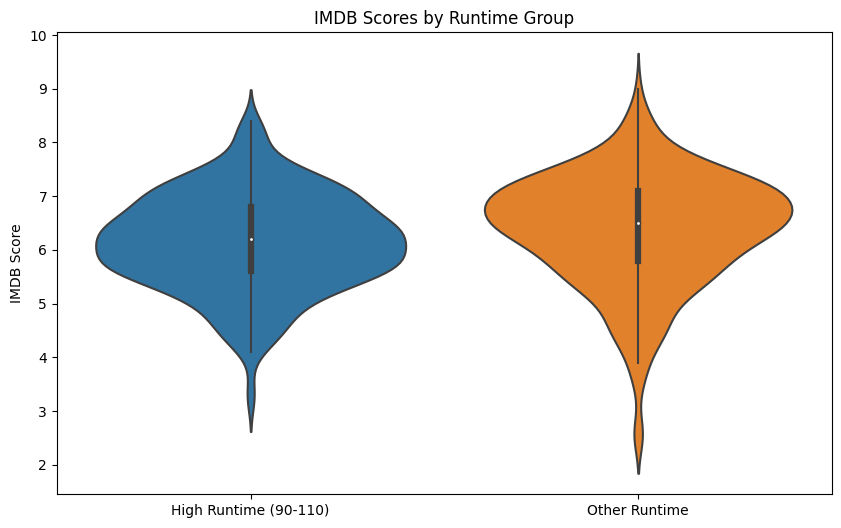

In [274]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_to_plot)
plt.xticks([0, 1], labels)
plt.title('IMDB Scores by Runtime Group')
plt.ylabel('IMDB Score')
plt.show()


In [262]:
# 정규성 검정
_, p_value_normality_high = stats.shapiro(scores_high_runtime)
_, p_value_normality_other = stats.shapiro(scores_other_runtime)

# 등분산성 검정
_, p_value_levene = stats.levene(scores_high_runtime, scores_other_runtime)

if p_value_normality_high < alpha:
    print("High runtime group does not follow a normal distribution.")
else:
    print("High runtime group follows a normal distribution.")

if p_value_normality_other < alpha:
    print("Other runtime group does not follow a normal distribution.")
else:
    print("Other runtime group follows a normal distribution.")

if p_value_levene < alpha:
    print("The two groups do not have equal variances.")
else:
    print("The two groups have equal variances.")


High runtime group follows a normal distribution.
Other runtime group does not follow a normal distribution.
The two groups have equal variances.


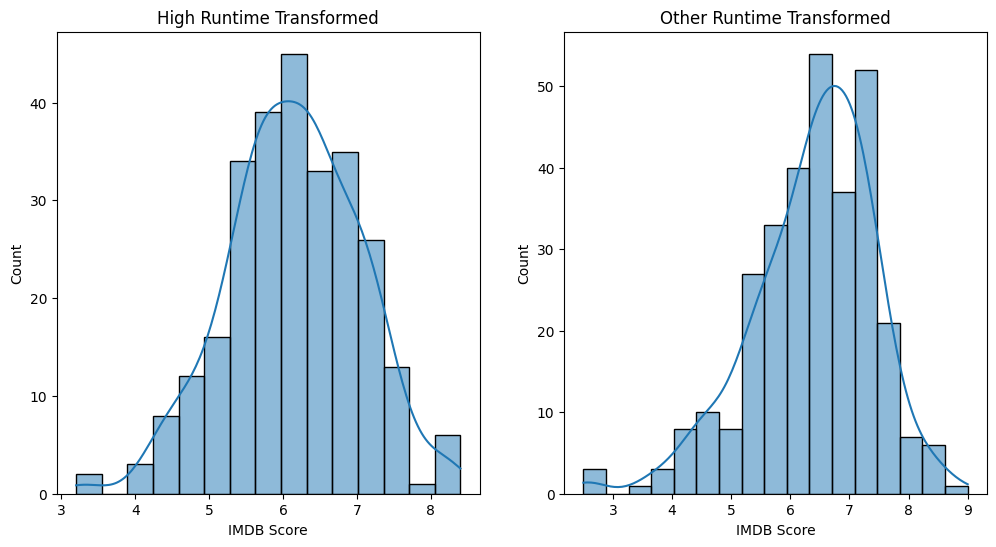

In [286]:
import numpy as np

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(scores_high_runtime, kde=True)
plt.title('High Runtime Transformed')

plt.subplot(1, 2, 2)
sns.histplot(scores_other_runtime, kde=True)
plt.title('Other Runtime Transformed')

plt.show()


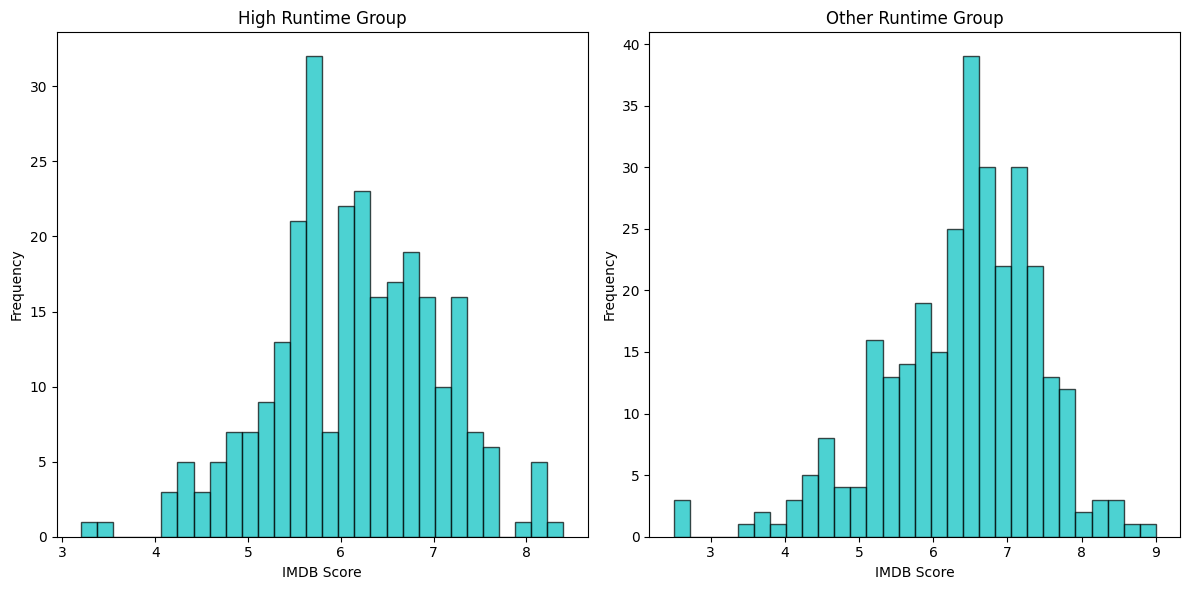

Shapiro-Wilk Test for High Runtime Group:  0.36594393849372864
Shapiro-Wilk Test for Other Runtime Group:  9.678608421381796e-07


In [269]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# High Runtime 그룹 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(scores_high_runtime, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.title('High Runtime Group')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

# Other Runtime 그룹 히스토그램 그리기
plt.subplot(1, 2, 2)
plt.hist(scores_other_runtime, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.title('Other Runtime Group')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Shapiro-Wilk 정규성 검정
stat, p_value_high = shapiro(scores_high_runtime)
stat, p_value_other = shapiro(scores_other_runtime)

print("Shapiro-Wilk Test for High Runtime Group: ", p_value_high)
print("Shapiro-Wilk Test for Other Runtime Group: ", p_value_other)


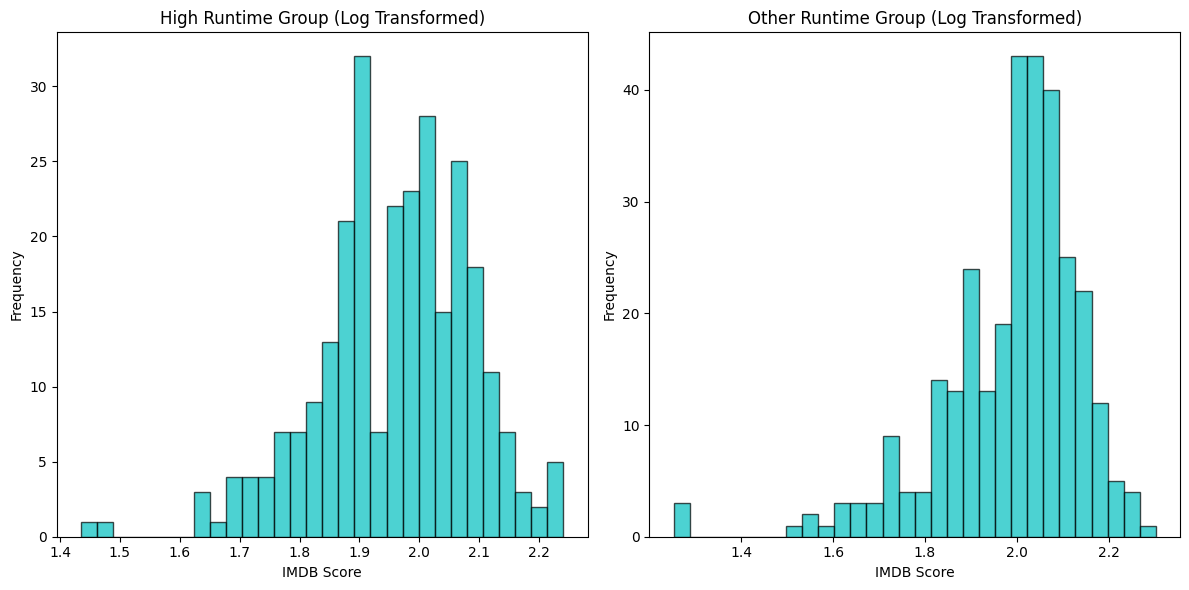

Shapiro-Wilk Test for High Runtime Group (Log Transformed):  0.00020645813492592424
Shapiro-Wilk Test for Other Runtime Group (Log Transformed):  4.4917108227293667e-13


In [270]:
import numpy as np

# 로그 변환
scores_high_runtime_log = np.log1p(scores_high_runtime)
scores_other_runtime_log = np.log1p(scores_other_runtime)

# High Runtime 그룹 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(scores_high_runtime_log, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.title('High Runtime Group (Log Transformed)')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

# Other Runtime 그룹 히스토그램 그리기
plt.subplot(1, 2, 2)
plt.hist(scores_other_runtime_log, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.title('Other Runtime Group (Log Transformed)')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Shapiro-Wilk 정규성 검정
stat, p_value_high_log = shapiro(scores_high_runtime_log)
stat, p_value_other_log = shapiro(scores_other_runtime_log)

print("Shapiro-Wilk Test for High Runtime Group (Log Transformed): ", p_value_high_log)
print("Shapiro-Wilk Test for Other Runtime Group (Log Transformed): ", p_value_other_log)


In [271]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres,Genre_combinations
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary],documentary
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller],thriller
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]",drama/sci_fi
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"[horror, thriller]",horror/thriller
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[mystery],mystery
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[concert],concert
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,[documentary],documentary
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[one_man_show],one_man_show
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[documentary],documentary


               count      mean
Genres                        
concert            6  7.633333
making_of          2  7.450000
one_man_show       3  7.133333
historical         2  7.050000
documentary      159  6.936478
short              7  6.771429
aftershow          6  6.750000
interview          6  6.750000
war                5  6.740000
crime             13  6.676923
animation         21  6.638095
spy                2  6.600000
christmas          5  6.580000
adventure         10  6.470000
biographical      10  6.440000
drama            129  6.278295
supernatural       2  6.250000
psychological      6  6.233333
sports             4  6.100000
variety_show       5  6.100000
musical           14  6.085714
dark_comedy        5  6.040000
anthology          2  5.950000
romance           57  5.900000
family             7  5.885714
fantasy            6  5.850000
mockumentary       2  5.850000
comedy           136  5.822794
satire             2  5.800000
sci_fi            19  5.794737
action  

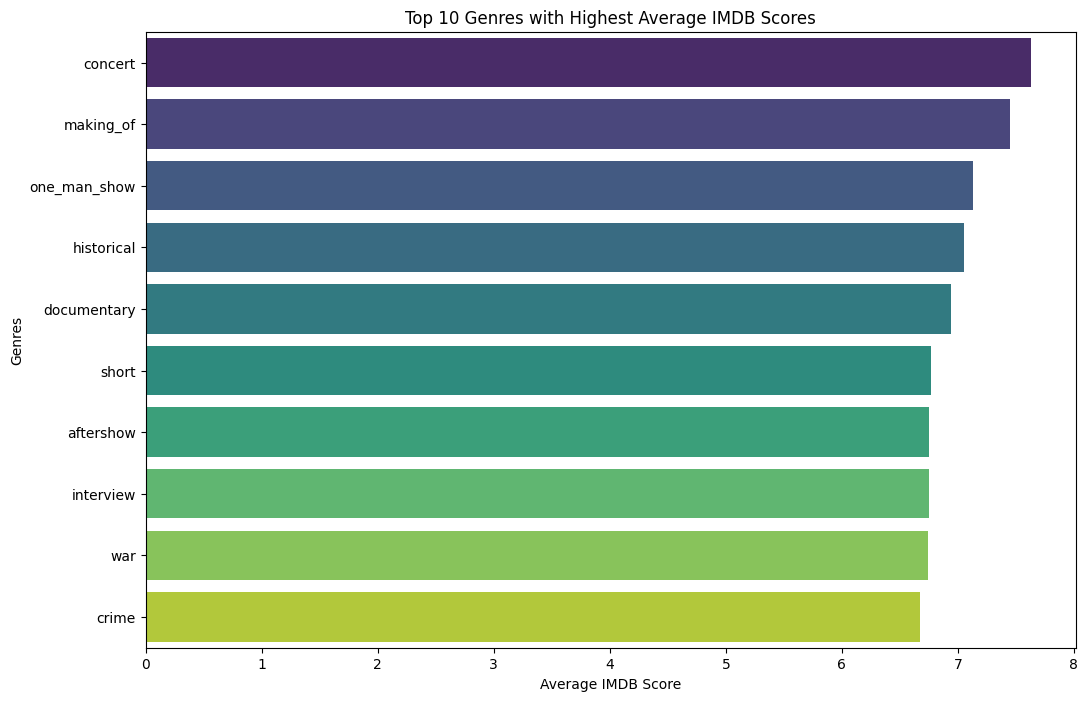

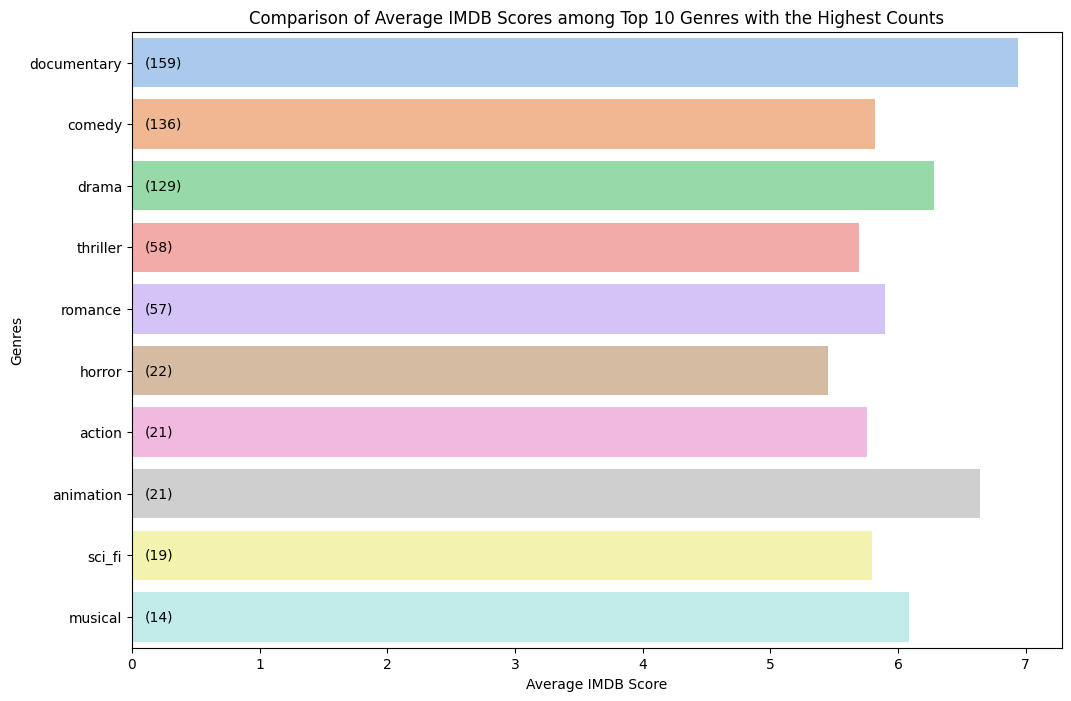

In [275]:
# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 영화 개수(count)와 평균 평점(mean) 계산
genre_stats = expanded_df.groupby('Genres')['IMDB Score'].agg(['count', 'mean'])

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats[genre_stats['count'] >= 2].sort_values(by='mean', ascending=False)

# 정렬된 결과 출력
print(sorted_genre_stats)
import matplotlib.pyplot as plt
import seaborn as sns

# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 영화 개수(count)와 평균 평점(mean) 계산
genre_stats = expanded_df.groupby('Genres')['IMDB Score'].agg(['count', 'mean'])

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats[genre_stats['count'] >= 2].sort_values(by='mean', ascending=False)

# 상위 10개 장르 선택
top_10_genres = sorted_genre_stats.head(10)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_10_genres.index, data=top_10_genres, palette='viridis')
plt.xlabel('Average IMDB Score')
plt.ylabel('Genres')
plt.title('Top 10 Genres with Highest Average IMDB Scores')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 영화 개수(count)와 평균 평점(mean) 계산
genre_stats = expanded_df.groupby('Genres')['IMDB Score'].agg(['count', 'mean'])

# 카운트가 가장 많은 상위 10개 장르 선택 후 평점을 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats.sort_values(by='count', ascending=False).head(10).sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=sorted_genre_stats.index, data=sorted_genre_stats, palette='pastel')

# 눈금에 카운트 수 추가
for i, genre in enumerate(sorted_genre_stats.index):
    count = sorted_genre_stats.loc[genre, 'count']
    ax.text(0.1, i, f'({count})', va='center')

plt.xlabel('Average IMDB Score')
plt.ylabel('Genres')
plt.title('Comparison of Average IMDB Scores among Top 10 Genres with the Highest Counts')
plt.show()

Levene Statistic (Squared Data): 1.3496923534300898
P-Value (Squared Data): 0.24580812244645256
Equal Variance T-Test
T-Statistic (Squared Data): 3.760767950942394
P-Value (Squared Data): 0.00018651509348783713
English Mean Score: 6.38004987531172
Non-English Mean Score: 6.034426229508198


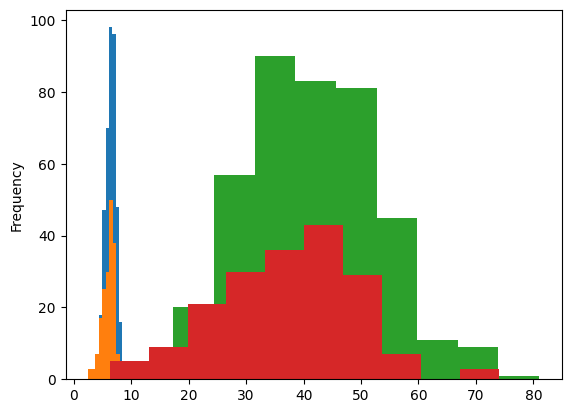

In [277]:
from scipy import stats
import numpy as np

# English 언어인 경우와 그렇지 않은 경우의 평점 추출
english_scores = df[df['Language'] == 'English']['IMDB Score']
non_english_scores = df[df['Language'] != 'English']['IMDB Score']

english_scores.plot(kind="hist")
non_english_scores.plot(kind="hist")

import numpy as np
np.square(english_scores).plot(kind="hist")
np.square(non_english_scores).plot(kind="hist")

# 평균 평점 계산
english_mean = english_scores.mean()
non_english_mean = non_english_scores.mean()

# 스퀘어 변환 적용
english_scores_squared = np.square(english_scores)
non_english_scores_squared = np.square(non_english_scores)

# Levene's test 수행
statistic, p_value = stats.levene(english_scores_squared, non_english_scores_squared)

# 결과 출력
print('Levene Statistic (Squared Data):', statistic)
print('P-Value (Squared Data):', p_value)

# 등분산성 가정이 성립하는 경우
if p_value > 0.05:
    # 등분산성 가정하고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=True)
    print('Equal Variance T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)
else:
    # 등분산성 가정하지 않고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=False)
    print('Welch\'s T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)

# 평균 평점 출력
print('English Mean Score:', english_mean)
print('Non-English Mean Score:', non_english_mean)

<Axes: ylabel='Frequency'>

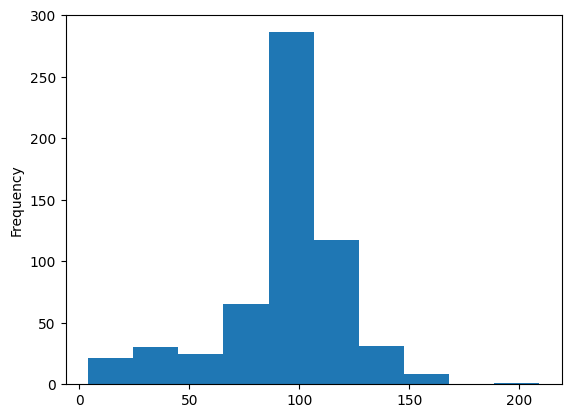

In [278]:
df['Runtime'].corr(df['IMDB Score'])
df['Runtime'].plot(kind='hist')

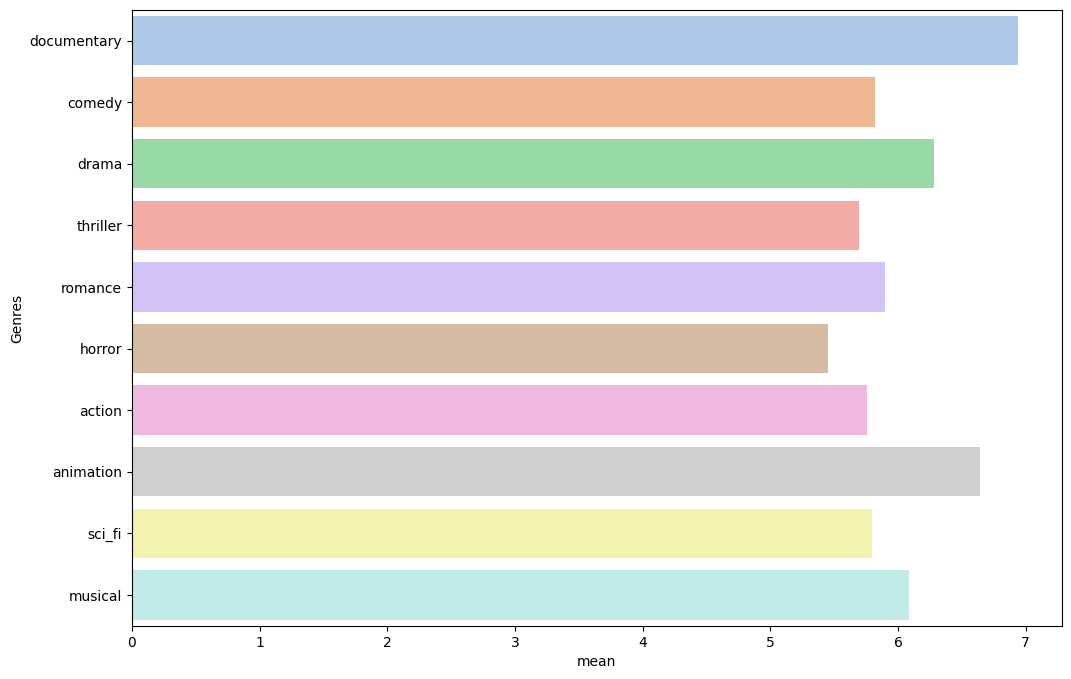

In [287]:

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=sorted_genre_stats.index, data=sorted_genre_stats, palette='pastel')


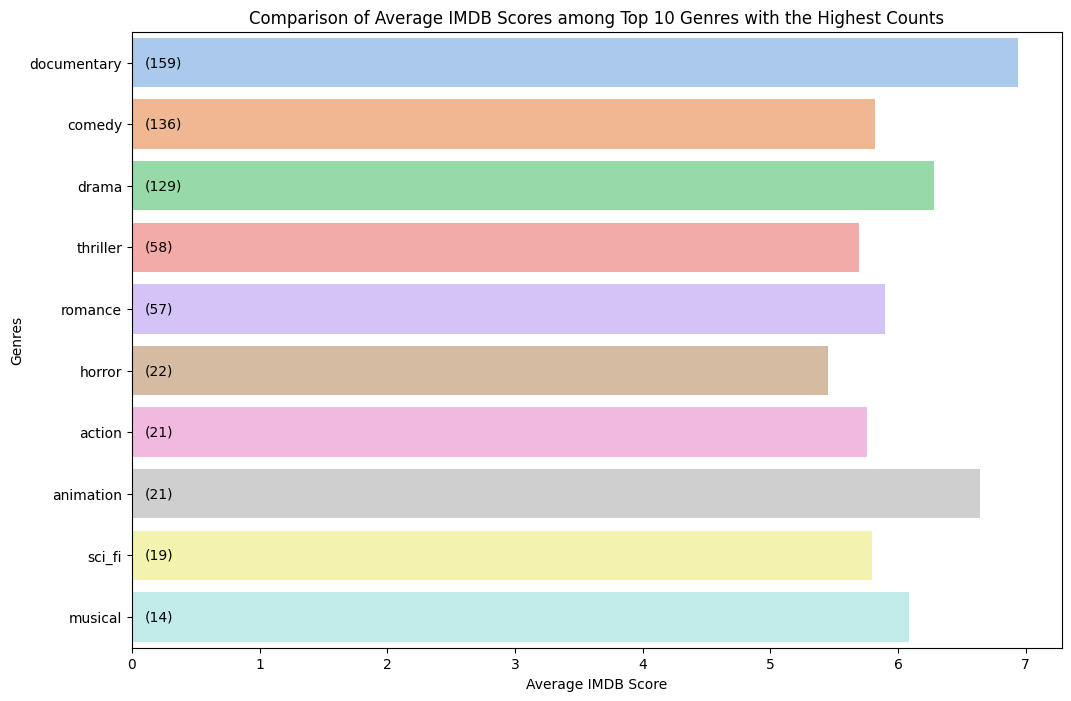

In [288]:

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=sorted_genre_stats.index, data=sorted_genre_stats, palette='pastel')

# 눈금에 카운트 수 추가
for i, genre in enumerate(sorted_genre_stats.index):
    count = sorted_genre_stats.loc[genre, 'count']
    ax.text(0.1, i, f'({count})', va='center')

plt.xlabel('Average IMDB Score')
plt.ylabel('Genres')
plt.title('Comparison of Average IMDB Scores among Top 10 Genres with the Highest Counts')
plt.show()